In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (15, 15)

In [2]:
config = {
    "inputData": "/path/to/input/data/*",
    "outDir": "/home/jvdzwaan/data/dilipad/results/all_years-adj-cabinets_selected-parties/{}",
    "nTopics": 100
}

usefulness_data = pd.read_excel(config.get('outDir').format('topics_100.xlsx'), index_col=0)
topic_coherence_data = pd.read_csv(config.get('outDir').format('topic_coherence_100.csv'), index_col=0)

data = pd.concat([usefulness_data, topic_coherence_data], axis=1)
data

,words,usefulness,cap,10
0,draagvlak herindeling stad inwoner samenwerkin...,3,14,0.44352
1,risico systeem effect voordeel prikkel nadeel ...,1,NaN,0.56865
2,argument bezwaar redenering argumentatie grond...,1,NaN,0.52150
3,besluit oordeel notitie procedure beslissing b...,1,NaN,0.57542
4,auto weg verkeer kilometerheffing waterstaat f...,3,10,0.56065
5,ondersteuning aanbesteding hulp dienst budget ...,3,3,0.57835
6,grens buitenland verkeer principe lijn verschi...,1,NaN,0.32548
7,ziekenhuis verzekeraar zorgverzekeraar premie ...,3,3,0.69189
8,bewindsman aanpak uitvoering resultaat inzet r...,1,NaN,0.51310
9,regel regelgeving fraude schip bureaucratie we...,1,NaN,0.61924


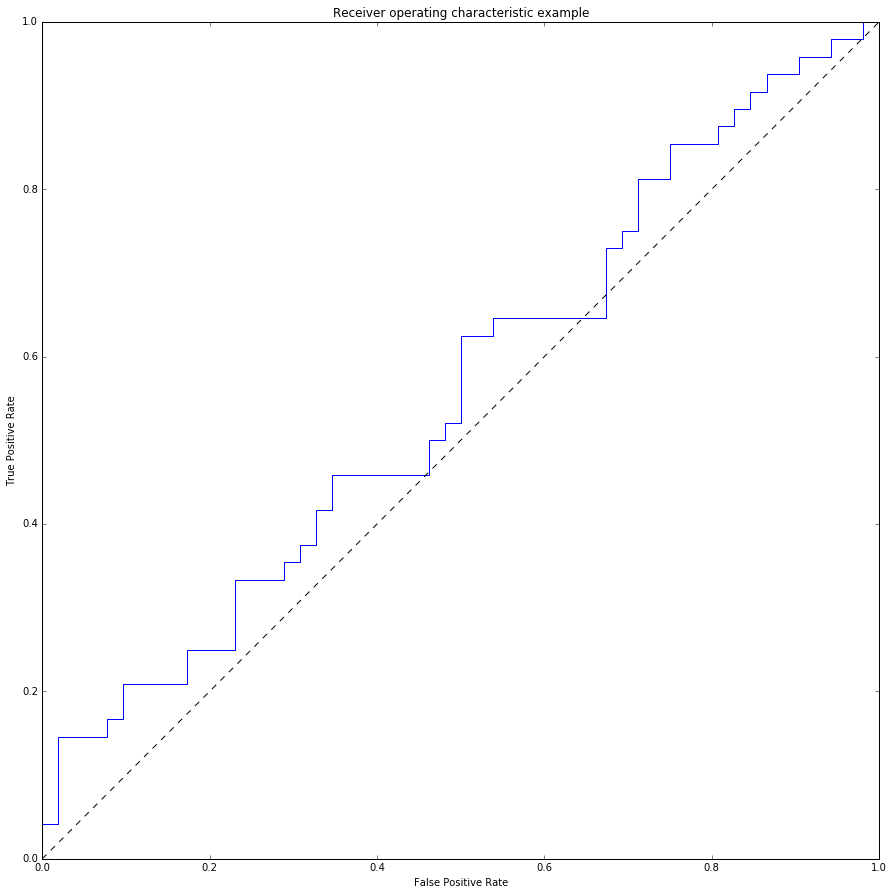

In [7]:
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve

fpr, tpr, thr = roc_curve(data['usefulness'] == 3, data['10'])

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Topic coherence')
plt.legend(loc="lower right")
plt.show()

ROC curve komt net boven random uit, dat is teleurstellend (maar niet geheel onverwachts).

Volgende stap is vergelijken vocabulaire lemma's uit frog vs. uit pattern.

Wat ook nog kan: andere measures proberen (alle opties uit palmetto, dat zijn er 6 ofzo)

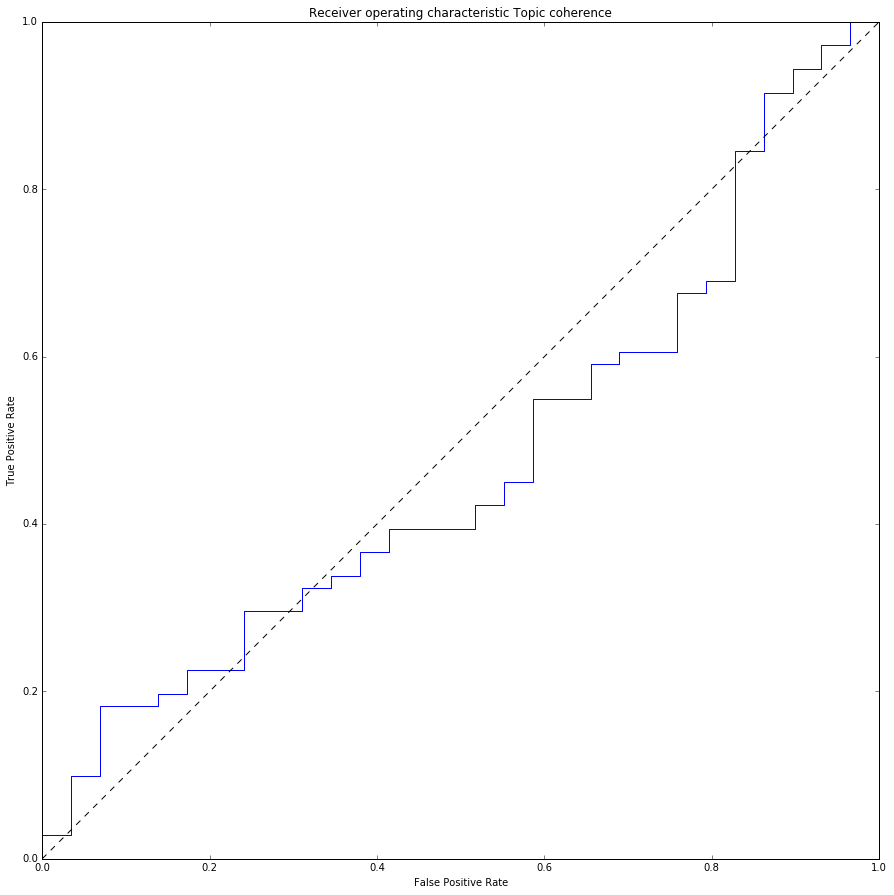

In [11]:
from sklearn.metrics import roc_curve

fpr, tpr, thr = roc_curve(data['usefulness'] >= 2, data['10'])

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Topic coherence')
plt.legend(loc="lower right")
plt.show()